# Project: Investigate a Dataset: Medical Appointment No Shows



## Table of Contents
- [Introduction](#introduction)
- [Data Wrangling](#data_wrangling)
- [Exploratory Data Analysis](#eda)
- [Conclusions](#conclusions)

<a id='introduction'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil in the year 2016 and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Some columns are described here:
- "ScheduledDay" tells us on what day the patient set up their appointment.
- "Neighborhood" indicates the location of the hospital.
- "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
- "No-show" indicates "Yes" if the patient did ***not*** show up and "No" if the patient showed up.

<a id='q_a'></a>
### Question(s) for Analysis
We are going to explore the data and look for answers to the following questions:
- Does the patient's age determine the likelihood of showing up to the appointment?
- Does the patient gender tell us if a patient is likely to show up to the appointment?
- Does it reduces the chances of the patient showing up if the appointment is scheduled far into the future?
- Do hypertension, diabetes, or alcoholism influence whether the patient shows up to the appointment?
- Does being handicapped influence whether the patient shows up to the appointment?
- Does being enrolled in Bolsa Familia correlate to patients showing up to the appointment?
- Does being alerted via SMS increases the chances of the patient showing up to the appointment?

<a id='data_wrangling'></a>
## Data Wrangling

### General Properties

In [62]:
# Setting up the packages to use in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
# Importing the dataset CSV file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 110527 rows and 14 columns of data. 
The dataset does *not* have null values. 
The data types of the dates is object.

In [65]:
type(df['ScheduledDay'][0])

str

In [66]:
type(df['AppointmentDay'][0])

str

Both data types of the dates are strings, we'll need to convert those to the `datetime` data type.

In [67]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Seems like there's a minimum age of '-1' which is incongruent, we will discard these, and the maximum age is 115 which is possible so we will keep those rows. 

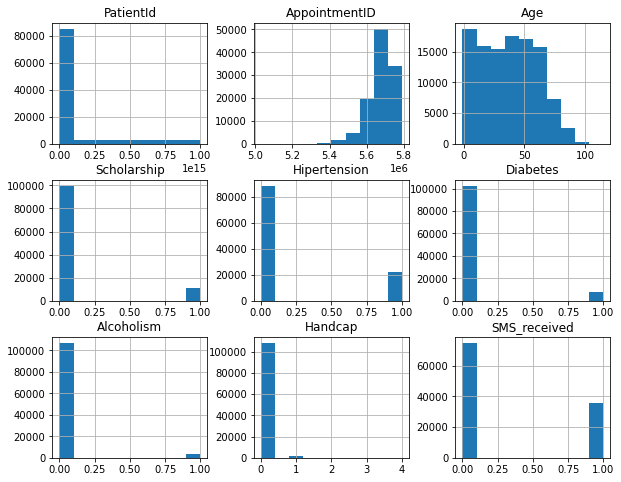

In [68]:
df.hist(figsize=(10,8));

In [69]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The indicators in the Scholarship, Hypertension, Diabetes, Alcoholism, and SMS_received are normal, there are only two variants, 1 and 0, yes or no, but there seem to be 5 numbers in handicap, we will check if the numbers of incidents apart from 0 and 1 are too many if so we might discard the column because the data does not provide explanation of the meaning of numbers larger than 1, if there are only a few incidents we will get rid of those rows. 

In [70]:
df.query('Handcap > 1').count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

There are only 199 occurrences of the Handicap indicator higher than 1. We will get rid of those rows because the data does not provide explanation of the meaning of numbers larger than 1.

In [71]:
df.query('Age == -1').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

There's only 1 occurrence of Age '-1'. We'll get rid of that too. 

In [72]:
df[df.duplicated() == True].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no duplicated rows in this dataset. 

### Data Cleaning

In [73]:
df.rename(columns = str.lower, inplace=True)

In [74]:
df.rename(columns = {'no-show' : 'showed_up', 'hipertension' : 'hypertension', 'handcap' : 'handicap'}, inplace=True)

In [75]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [76]:
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


We change the column labels to lowercase, convert to underscore the spaces between words, and translate the labels to the English language to have a consistent format.

We also drop the 'patientid' and 'appointmentid' columns because we won't be needing them.

The "no-show" values will be changed to have consistent indicators, right now "No" means the patient showed up, and "Yes" means the patient did ***not*** show up.

In [77]:
df['showed_up'] = df['showed_up'].map({'No':'Yes',
                                      'Yes':'No'},
                                      na_action=None)


Change the "showed_up" column from "No" to "Yes" and vice versa, to have a consistent definition. 

In [78]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
type(df['scheduledday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
type(df['appointmentday'][0])

pandas._libs.tslibs.timestamps.Timestamp

We convert the data types of the dates when the appointments were scheduled and the dates when the appointments took place to datetime stamps.

In [80]:
daysbetween = df['appointmentday'].dt.date - df['scheduledday'].dt.date
df['daysbetween'] = daysbetween.dt.days.view(int)
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,daysbetween
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,0


We now add a new column with the number of days between the scheduling of the appointment and the appointment itself. 

In [81]:
df[df['daysbetween'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,daysbetween
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,No,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,No,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,No,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,No,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,No,-1


We can see that some appointments were scheduled days after they were supposed to happen. 

In [82]:
df.query('daysbetween < 0').count()

gender            5
scheduledday      5
appointmentday    5
age               5
neighbourhood     5
scholarship       5
hypertension      5
diabetes          5
alcoholism        5
handicap          5
sms_received      5
showed_up         5
daysbetween       5
dtype: int64

In [83]:
df.drop(df.query('daysbetween < 0').index, inplace=True)

They are only 5 rows so we'll get rid of those. 

In [84]:
df.drop(df.query('handicap > 1').index, inplace=True);

We get rid of the handicap indicators above 1. There were only 199 of them, those might have been mistakes when entering the data. 

In [85]:
df.drop(df.query('age < 0').index, inplace=True)

We also get rid of the row with age '-1' because it does not make sense. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: Does the patient's age determine the likelihood of showing up to the appointment?

In [86]:
df_showed_up = df.query('showed_up == "Yes"')
df_not_showed_up = df.query('showed_up == "No"')

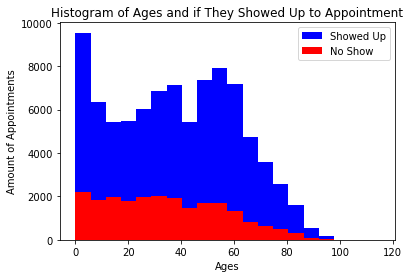

In [87]:
plt.hist(df_showed_up['age'], bins=20, color='blue')
plt.hist(df_not_showed_up['age'], bins=20, color='red')
plt.ylabel('Amount of Appointments')
plt.xlabel('Ages')
plt.title('Histogram of Ages and if They Showed Up to Appointment')
plt.legend(['Showed Up', 'No Show']);

It seems that there are more appointments for babies and young children, and the majority of them show up to the appointment. There are fewer appointments made by people ages 10 - 25 approximately, presumably because they are healthier at that age. We see that for people ages 26 - 64 there is a growth in the number of appointments, except for a considerate decrease of appointments in people ages 41 - 48 approximately. The distribution is skewed to the right mainly because of the life expectancy. According to the data of the United Nations, in the period 2010 - 2015, in which this data was taken, Brazil had a life expectancy of 74.34.

 ### Research Question: Does the patient gender tell us if a patient is likely to show up to the appointment?

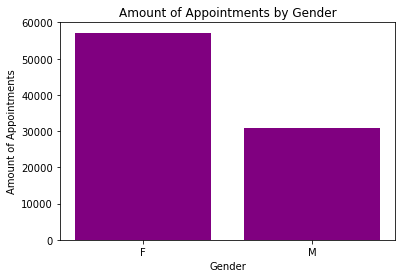

In [88]:
f_amount = df_showed_up.query('gender == "F"')['gender'].count()
m_amount = df_showed_up.query('gender == "M"')['gender'].count()
values = [f_amount, m_amount]
genders = ['F', 'M']

plt.bar(genders, values, color='purple')

plt.ylabel('Amount of Appointments')
plt.xlabel('Gender')
plt.title('Amount of Appointments by Gender');

There are more appointments made by women than men.

In [89]:
percent_show_gender = df_showed_up['gender'].value_counts() / df_showed_up.shape[0] * 100
percent_show_gender

F    64.920669
M    35.079331
Name: gender, dtype: float64

In [90]:
percent_no_show_gender = df_not_showed_up['gender'].value_counts() / df_not_showed_up.shape[0] * 100
percent_no_show_gender

F    65.393077
M    34.606923
Name: gender, dtype: float64

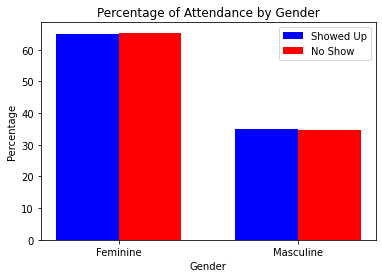

In [91]:
ind_x = np.arange(len(percent_show_gender))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_gender, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_gender, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('Percentage of Attendance by Gender')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['Feminine', 'Masculine']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

We see in the "Percentage of Attendance by Gender" chart that despite women having more appointments, roughly half of the men and half of the women don't show up to the appointment. There's **no** correlation between genders and not showing up to the appointment. 

### Research Question: Does it reduces the chances of the patient showing up if the appointment is scheduled far into the future?

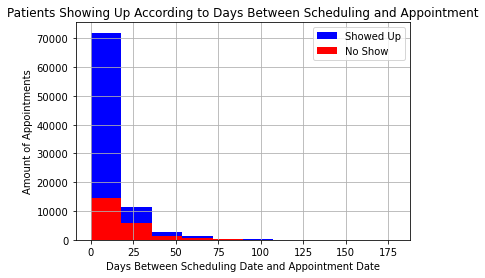

In [92]:
df_showed_up['daysbetween'].hist(color=['blue'])
df_not_showed_up['daysbetween'].hist(color=['red'])
plt.ylabel('Amount of Appointments')
plt.xlabel('Days Between Scheduling Date and Appointment Date')
plt.title('Patients Showing Up According to Days Between Scheduling and Appointment')
plt.legend(['Showed Up', 'No Show']);

We see that most of the appointments are close to the day of them being scheduled. But we need to see the proportions of each bin.

In [93]:
df.groupby('showed_up')['daysbetween'].describe()

,count,mean,std,min,25%,50%,75%,max
showed_up,,,,,,,,
No,22273.0,15.834778,16.600478,0.0,4.0,11.0,23.0,179.0
Yes,88049.0,8.758986,14.556123,0.0,0.0,2.0,12.0,179.0


In [94]:
bin_edges = [ 0, 7, 14, 30, 179 ]
bin_names = ['0-7 days', '8-14 days', '15-30 days', '31-179 days']
df['periodsdaysbetween'] = pd.cut(df['daysbetween'], bin_edges, labels=bin_names, include_lowest=True , right=True)

We separate the appointments into periods, and then we create a bar chart with the percentages of people showing up and *not* showing up.

In [95]:
df_showed_up = df.query('showed_up == "Yes"')
show_daysbetween = df_showed_up['periodsdaysbetween'].value_counts()
show_daysbetween

0-7 days       61065
15-30 days     11689
8-14 days       8346
31-179 days     6949
Name: periodsdaysbetween, dtype: int64

In [96]:
df_not_showed_up = df.query('showed_up == "No"')
no_show_daysbetween = df_not_showed_up['periodsdaysbetween'].value_counts()
no_show_daysbetween

0-7 days       9543
15-30 days     5650
8-14 days      3662
31-179 days    3418
Name: periodsdaysbetween, dtype: int64

In [97]:
percent_show_daysbetween = []
percent_no_show_daysbetween = []
for period in list(df['periodsdaysbetween'].value_counts().index):
     show_period = show_daysbetween[period]
     noshow_period = no_show_daysbetween[period]
     percent_show_daysbetween.append(show_period / (show_period + noshow_period) * 100)
     percent_no_show_daysbetween.append(noshow_period / (show_period + noshow_period)  * 100)
     

In [98]:
list(df['periodsdaysbetween'].value_counts().index)

['0-7 days', '15-30 days', '8-14 days', '31-179 days']

In [99]:
percent_show_daysbetween

[86.4845343303875, 67.41449910606147, 69.50366422385076, 67.02999903540079]

In [100]:
percent_no_show_daysbetween

[13.515465669612508, 32.585500893938516, 30.496335776149238, 32.97000096459921]

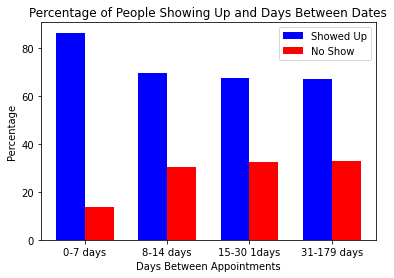

In [132]:
ind_x = np.array([0, 2, 1, 3])  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_daysbetween, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_daysbetween, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Days Between Appointments')
plt.title('Percentage of People Showing Up and Days Between Dates')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['0-7 days', '15-30 1days', '8-14 days', '31-179 days']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

When we isolate the percentages of each period we see that in the "0-7 days" period 86.48% show up for their appointment, and from 8 to 179 days between scheduling the appointment people showed up around 68% on average, which is an 18% drop in attendance. 

### Research Question: Do hypertension, diabetes, or alcoholism influence whether the patient shows up to the appointment?

The variables to analyze are very similar so we will create functions to automatically calculate and plot the data of each variable. 

In [102]:
# Percentage of people with variable condition
def percent_with_condition(df, xVar):
    return df.query(f'{xVar} == 1')[xVar].value_counts().div(df.shape[0]).mul(100).round(2)

In [127]:
def group_and_plot(df, xVar, normalize=False):
    # Data grouped by hypertension and showed up values counted
    if normalize:
        grouped = df.groupby([xVar])['showed_up'].value_counts(normalize=normalize).mul(100).round(2)
        y_label = 'Percentage'
    else:
        grouped = df.groupby([xVar])['showed_up'].value_counts(normalize=normalize)
        y_label = 'Amount'

    grouped.unstack().plot.bar(edgecolor='black', figsize=[14, 6], rot=0, width=0.8, color=['r', 'b']);
    labels = [f'No {xVar}'.title(), xVar.title()] # xtick labels
    plt.xticks([0,1], labels)

    # title and labels
    plt.ylabel(y_label)
    plt.xlabel(xVar.title())
    plt.title(f'{y_label} of Attendance by {xVar.title()} Diagnosis')


    table = plt.table(cellText = grouped.unstack().transpose().values,
                    rowLabels = [ 'No Show', 'Showed'],
                    colLabels = [f'No {xVar}'.title(), xVar.title()],
                    rowColours = ['r', 'b'],
                    cellLoc = 'center',
                    rowLoc = 'center',
                    loc = 'bottom',
                    bbox = [0, -0.75, 1, 0.5])

    table[(1, -1)].get_text().set_color('white')
    table[(1, -1)].set_text_props(fontweight='bold')
    table[(2, -1)].get_text().set_color('white')
    table[(2, -1)].set_text_props(fontweight='bold')

#### Hypertension

In [104]:
# Percentage of people with hypertension
percent_with_condition(df, 'hypertension')

1    19.68
Name: hypertension, dtype: float64

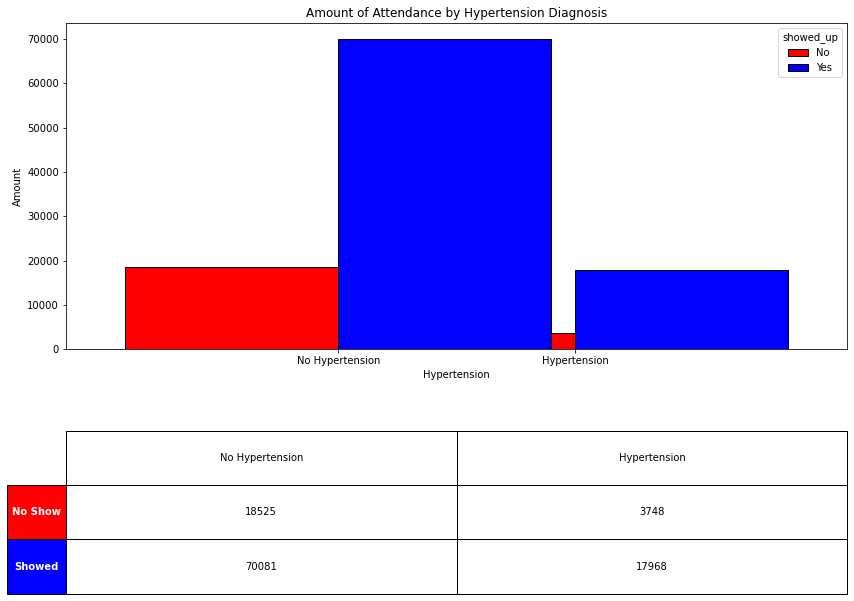

In [125]:
group_and_plot(df, 'hypertension')

According to a [paper published in the National Center for Biotechnology Information PubMed.gov](https://pubmed.ncbi.nlm.nih.gov/23118964/), the prevalence of hypertension in Brazil in the 2000s by the Joint National Committee (JNC) criteria is 28.7% of the population.

We visualize in the chart that the number of people with hypertension is much lower than the number of people who don't have the condition, as calculated above, the percentage of people with hypertension in this sample is 19.68%. This sample is not representative of this variable in the population. 

Now we'll calculate the percentage of attendance for people with hypertension and those without the condition.

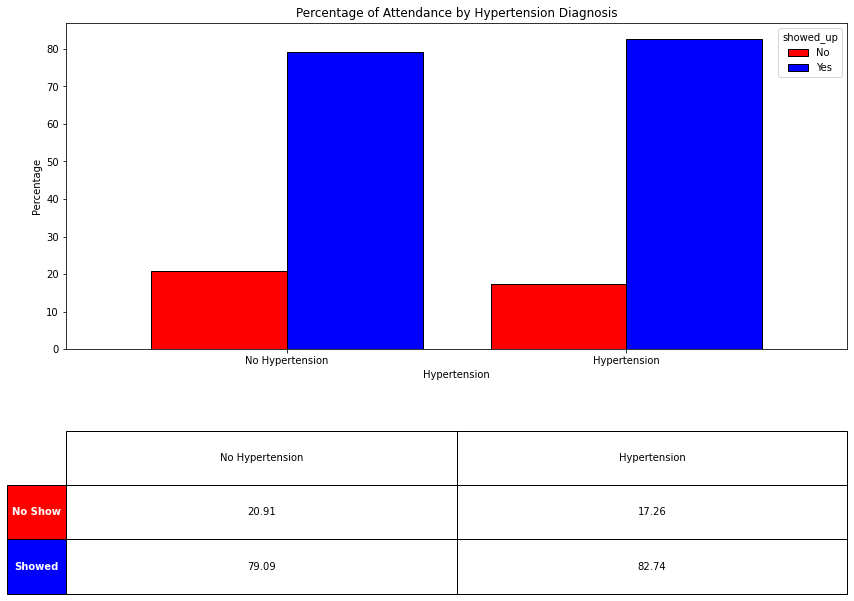

In [106]:
group_and_plot(df, 'hypertension', True)

We see that people who have hypertension tend to assist their appointment 3.65% more than people who don't have hypertension.

#### Diabetes

In [107]:
# Percentage of people with hypertension
percent_with_condition(df, 'diabetes')

1    7.16
Name: diabetes, dtype: float64

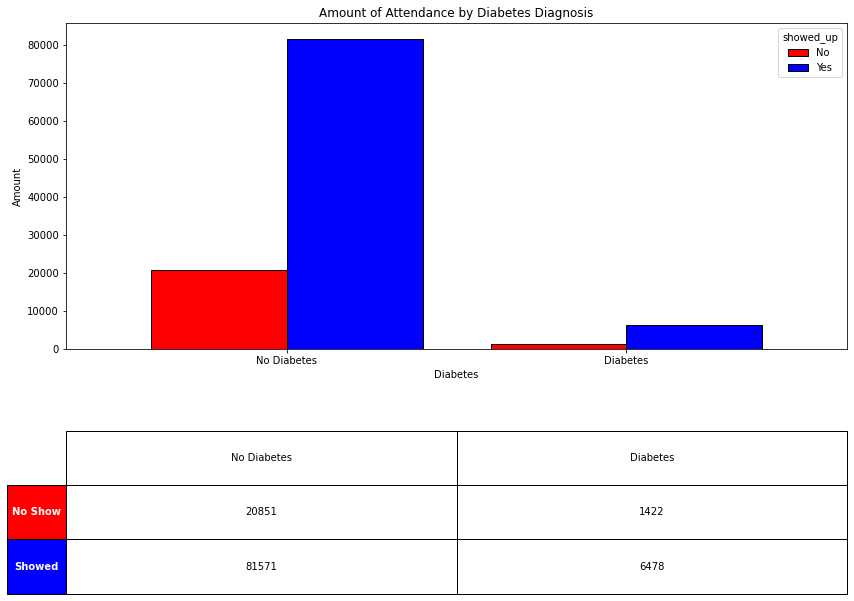

In [108]:
group_and_plot(df, 'diabetes')

The number of people with diabetes is even lower than the number of people with hypertension. Only 7.16% of people in this sample have diabetes. [The percentage of people with diabetes in Brazil according to the World Health Organization is 8.1%](https://cdn.who.int/media/docs/default-source/country-profiles/diabetes/bra_en.pdf?sfvrsn=3956c0c5_46&download=true). It seems that our sample is representative of the population. 

Now we'll calculate the percentage of attendance for people with diabetes and those without the condition.

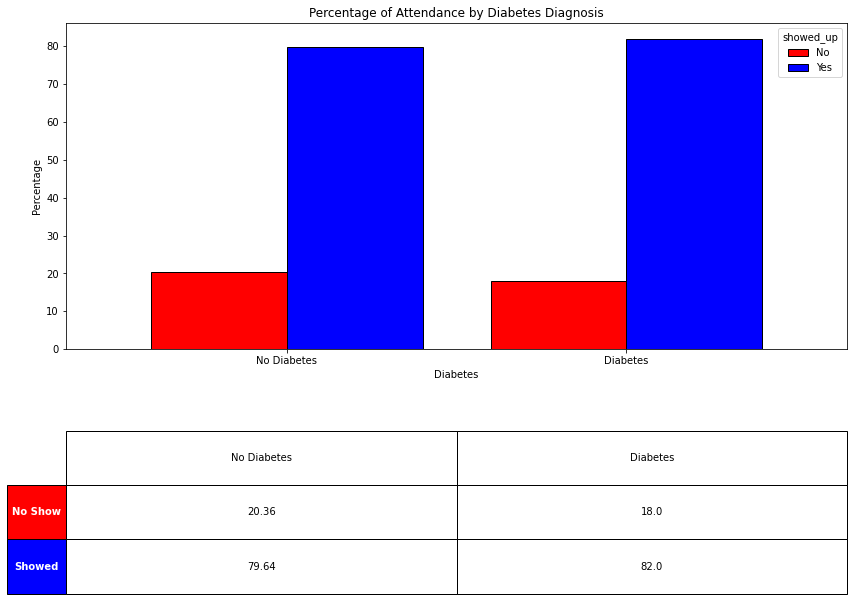

In [109]:
group_and_plot(df, 'diabetes', True)

We see that people who have diabetes attend 2.36% more than people who don't have diabetes. 

#### Alcoholism

In [110]:
# Percentage of people with alcoholism
percent_with_condition(df, 'alcoholism')

1    3.04
Name: alcoholism, dtype: float64

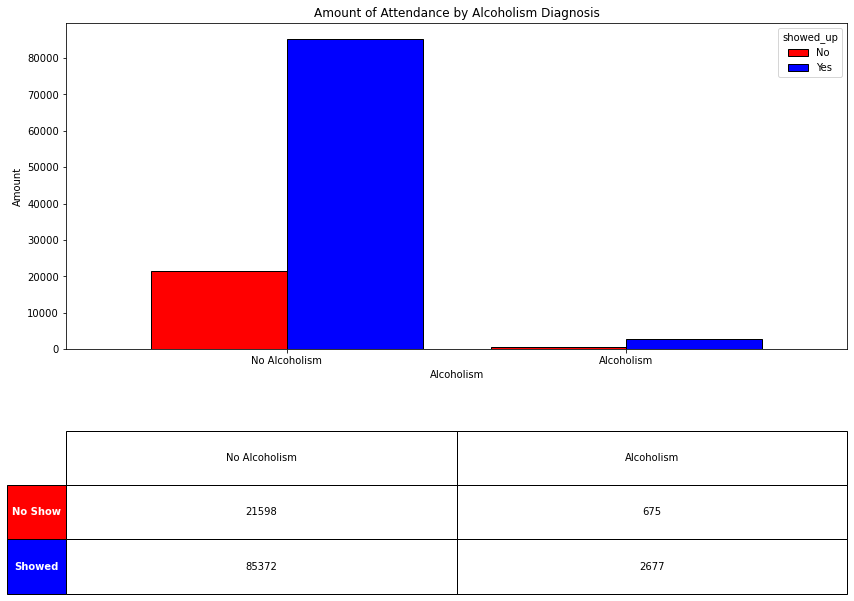

In [111]:
group_and_plot(df, 'alcoholism')

According to the [estimates of the World Health Organization for Brazil in 2016](https://cdn.who.int/media/docs/default-source/country-profiles/substances-abuse/bra.pdf?sfvrsn=d3fdd0e9_3&download=true), alcohol dependence is part of 2.3% of the population. We don't have details of how our dataset categorizes alcoholism, but 3.04% of our sample has this condition and is very close to the calculation of alcohol dependence by the WHO. 

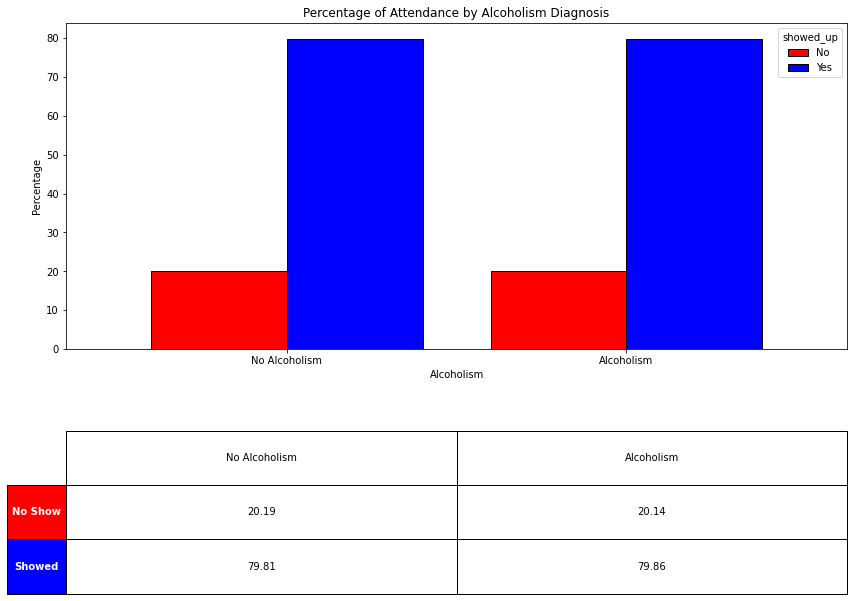

In [112]:
group_and_plot(df, 'alcoholism', True)

We can see that there's virtually no difference in the percentage of people who have alcoholism and their attendance.

### Research Question: Does being handicapped influence whether the patient shows up to the appointment?

In [113]:
# Percentage of people handicapped
percent_with_condition(df, 'handicap')

1    1.85
Name: handicap, dtype: float64

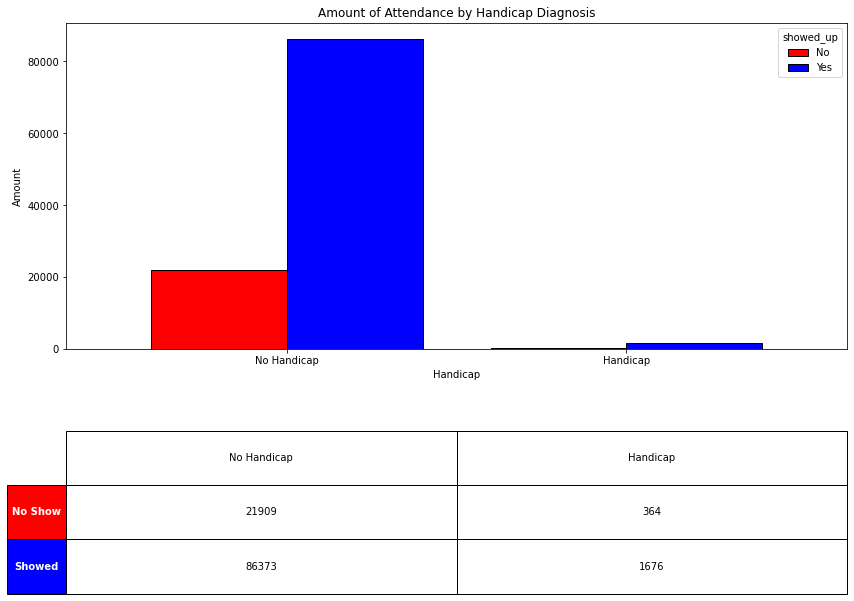

In [114]:
group_and_plot(df, 'handicap')

According to [a United Nations Fact Sheet about disability](https://www.un.org/development/desa/disabilities/resources/factsheet-on-persons-with-disabilities/disability-and-employment.html), in the year 2000, 24.5 million people had some type of disability out of the 211.1 million people in its population, which represents the 11.60%. If we compare that number to the percentage of people with a disability in our sample, 1.85%, we see that there's a significant difference. It seems that our sample is not representative of the population. 

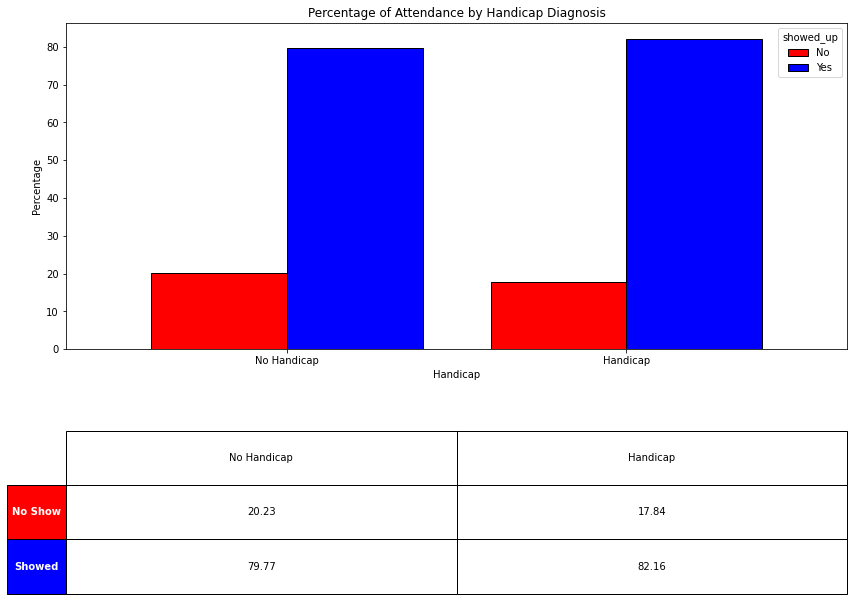

In [115]:
group_and_plot(df, 'handicap', True)

The number of people handicapped is very low, but we can see there's a 2.39% more attendance from people handicapped compared to people who are not handicapped. 

### Research Question: Does being enrolled in Bolsa Familia correlate to patients showing up to the appointment?

In [116]:
# Percentage of people enrolled in the program Bolsa Familia
percent_with_condition(df, 'scholarship')

1    9.83
Name: scholarship, dtype: float64

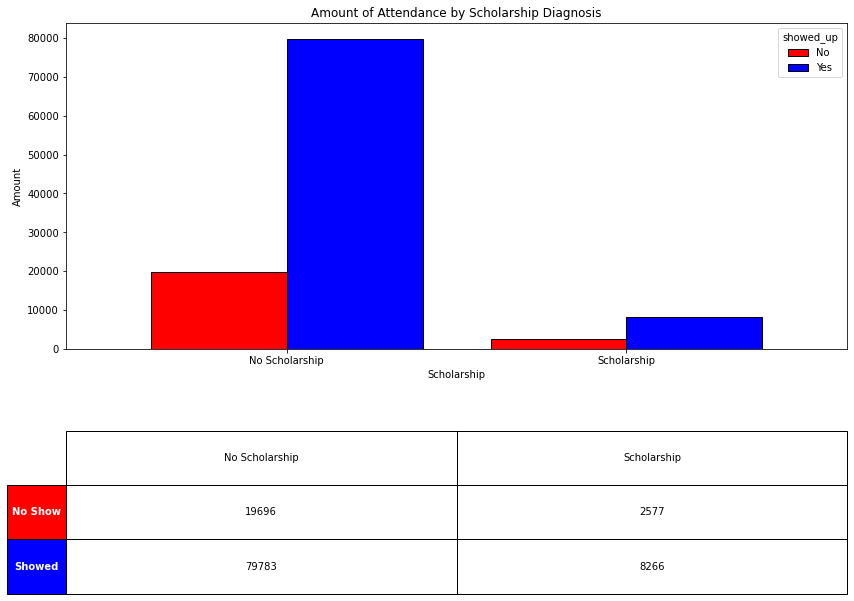

In [117]:
group_and_plot(df, 'scholarship')

In this chart we can see that the people enrolled in the program Bolsa Familia is only 9.83%. 

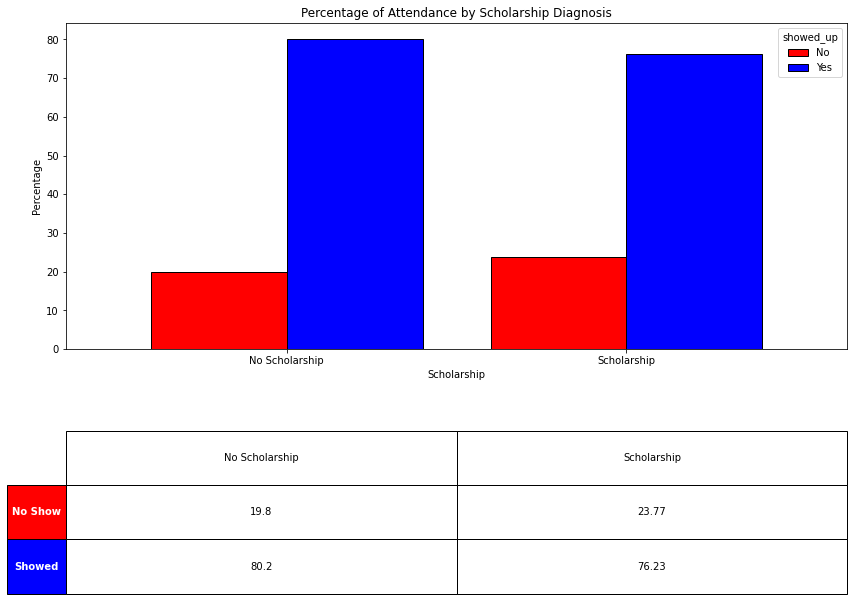

In [118]:
group_and_plot(df, 'scholarship', True)

There are more people who **do not** have the scholarship Bolsa Familia, and we can see that people who have this scholarship miss their appointments by 3.97% more.

### Research Question: Does being alerted via SMS increases the chances of the patient showing up to the appointment?

In [119]:
# Percentage of people alerted via SMS
percent_with_condition(df, 'sms_received')

1    32.12
Name: sms_received, dtype: float64

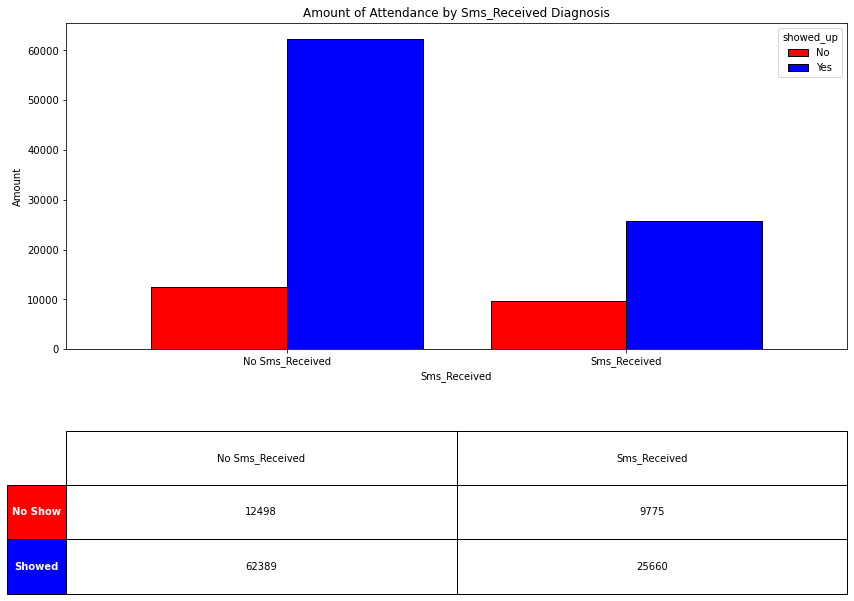

In [120]:
group_and_plot(df, 'sms_received')

We can visualize in the chart that only 32.12% of people were alerted via SMS for their appointment. 

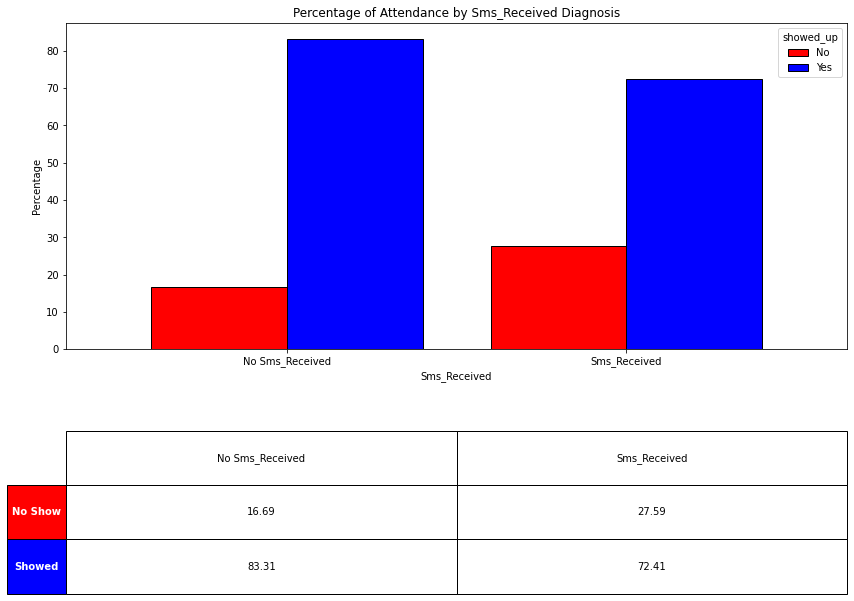

In [121]:
group_and_plot(df, 'sms_received', True)

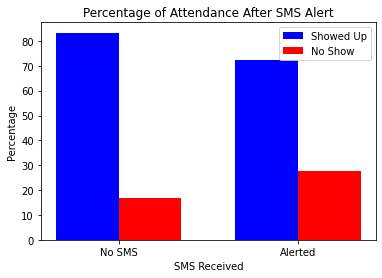

In [ ]:
ind_x = np.arange(len(percent_show_sms))  # the x locations for the groups
width_bars = 0.35       # the width of the bars

blue_bars = plt.bar(ind_x, percent_show_sms, width_bars, color='blue', label='Showed Up')
orange_bars = plt.bar(ind_x + width_bars, percent_no_show_sms, width_bars, color='red', label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('SMS Received')
plt.title('Percentage of Attendance After SMS Alert')
locations = ind_x + width_bars / 2  # xtick locations
labels = ['No SMS', 'Alerted']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

In [ ]:
# Percentage of people that showed up who were or not alerted via SMS
percent_show_scholarship

0    80.200846
1    76.233515
dtype: float64

In [ ]:
# Percentage of people that did not show up who were or not alerted via SMS
percent_no_show_scholarship

0    19.799154
1    23.766485
dtype: float64

The analysis shows that people who were alerted via SMS missed their appointments 3.97% more compared to people who were not alerted. 

<a id='conclusions'></a>
## Conclusions

- The amount of appointments made by women is approximately double of the amount of appointments made by men. But despite that, roughly half the women and half the men did not show up to their appointment. We cannot predict if a person will not show up based on gender.

- Babies and young children have more appointments than any other age group and they attend their appointments more in comparison to older people. We could say if the patient is very young there is a greater chance of showing up.

- People ages 10 - 25 and ages 41 - 48 schedule fewer appointments than the rest, but they tend to miss their appointments more. We also see that people ages 50 - 64 schedule more appointments and attend to them more than they miss compared to younger people, and there's a greater chance of them showing up when the age is closer to 64. 

- When the time between scheduling and the actual appointment is shorter people attend more. The period between 0 and 7 days has an attendance rate of 86.48%. If we schedule the appointment farther than 8 days the attendance rate decreases to 68% on average. We can claim that if the appointment is within one week of scheduling the greater the chance the patient will show up. 

- The data shows that people with chronic diagnoses like hypertension, diabetes, or handicap tend to show up to the appointments by 2 or 3 percentile points more than people who do not have these, except for alcoholism where there’s virtually no difference if a person is alcoholic or not. We can say that there's a greater chance of people showing up if they have a chronic disease but it's not significant. 

- The majority of people, around 90%, are not enrolled in the Bolsa Familia scholarship, but people who have this insurance miss their appointments by 3.97% more. 

- Being alerted via SMS about their appointments did not show a greater attendance, in fact, people who did not receive a notification attended by 3.97% more. There's no benefit in alerting the patient via SMS, although we don't how in advance they were notified with the data that we have. Calling them one day before their appointment might be a better solution, but we lack that information to say for certain, we would need to collect it. 

## Resources used to make this analysis

### Websites
- https://docs.python.org/3/tutorial/
- https://www.geeksforgeeks.org/
- https://stackoverflow.com/
- https://www.w3schools.com/
- https://www.datasciencemadesimple.com/
- https://knowledge.udacity.com/